# Test a Perceptual Phenomenon


Craig Nicholson  
September 4, 2015
* * *

In this project, you will investigate a classic phenomenon from experimental psychology called the Stroop Effect. You will learn a little bit about the experiment, create a hypothesis regarding the outcome of the task, then go through the task yourself. You will then look at some data collected from others who have performed the same task and will compute some statistics describing the results. Finally, you will interpret your results in terms of your hypotheses.

## Statistics: The Science of Decisions Project Instructions

### Background Information

In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a **congruent** words condition, and an **incongruent** words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example RED, BLUE. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example PURPLE, ORANGE. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

### Imports

In [1]:
import pandas as pd
import scipy.stats as stats
import statsmodels as sm
from scipy.stats import ttest_ind

In [2]:
# display plot within the notebook rather than a new window
%pylab inline

import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


### Load the data

In [3]:
# load the stroopdata.csv
path = '~/Downloads/P1/stroopdata.csv'
df = pd.read_csv(path)

### Questions For Investigation

### 1. What is our independent variable? What is our dependent variable?
The **independant variable** is the word list. We vary the word list by having the color of the ink match the color of the 'word' and the the opposite, where the color or the ink does not match the color of the word.


The **dependant variable** is time it takes to say out loud the color of the ink in which the word is printed.

Clarification of dependant variable:  The time it takes (seconds) to say the color of the ink for the color words for the congruent and incongruent list is what is being measured.  

**[Notes]**  
*An independent variable, sometimes called an experimental or predictor variable, is a variable that is being manipulated in an experiment in order to observe the effect on a dependent variable, sometimes called an outcome variable.*
 
*The dependent variable is the variable being measured which is affected by the independent variable*

Reference:
[Laerd Statistics : Types of Variable](https://statistics.laerd.com/statistical-guides/types-of-variable.php)


### 2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

**Null hypothesis**  
H0: μd = μ0  
The population mean of the differences (μd) equals the hypothesized mean of the differences (μ0).  

The null hypothesis, for this experiment would be the time it takes to say the color of the ink in the word lists takes approximately the same amount of time, on average, for the congruent and incongruent lists.  
A two tailed test woud be H1: μd ≠ μ0   

**Alternative hypothesis**

H1: μd < μ0  
The population mean of the differences (μd) is less than the hypothesized mean of the differences (μ0).  
*Use this for one tail test*

H1: μd ≠ μ0  
*Use this for two tail test*

The alternative hypothesis for a one tail test for this experiment would be the time it takes to say the color of the ink in the word lists takes much more larger amount of time, on average.

We will use H1: μd ≠ μ0  as our HA.

**Types of Statistical Test **
The types of statistical test one can use depends on the type of data.  The data for the Stroop task is interval and relatively normal.  Our options are the following:

- paired t-test - one tail
- paired t-test - two tail
- z test (requires knowing population mean and standard deviation)

####We will be performing a two tail T-Test.
H0: μd = μ0  
H1: μd ≠ μ0  

** [Notes] **  
μd - population  
μ0 - sample  

Tests whether the mean of the differences between dependent or paired observations is equal to a target value
http://support.minitab.com/en-us/minitab/17/topic-library/basic-statistics-and-graphs/hypothesis-tests/tests-of-means/why-use-paired-t/

The Z test requires a sample size approximately greater than of equal 30 (n>=30).
Z test requires the mu and sigman... mean and standard deviation

Udacity - Lesson 10-  t-Distribution    
- z = use when you have mu and sigma, mu is the average of the entire population.
- for this data we do not have the Stroop Effect of every know subject.
- Our samples can be dependant or indepentant Lesson 10 is dependant samples

When working with samples we have to estimate the std dev using Bessiles correction
instead of n use n-1 for this stdev.s in excel.

t-distribution is more prone to error.

t test/scores are less accurate because they have a larger margin of error, they are more spread out.

The variable is dependant when the same subject takes the test twice.
- two conditions
- takes pre test, and then post test
- growth over time

**Repeated measured design** experiment.  
H0: μd = μ0  
diff between two keyboards  
diff between two word lists  
 
**Longitudinal**   
H0: μtime1 = μtime2  
measure the var. at one point in time and then measaure again at another point in time  
4 years of age and 8 years of age.

**pre-test post test**   
H0: μpre = μpost  
before a treatment, and after the treatment




** References**

[idre UCLA - What statistical analysis should I use?](http://www.ats.ucla.edu/stat/mult_pkg/whatstat/)     
[NIST - What are statistical tests?](http://www.itl.nist.gov/div898/handbook/prc/section1/prc13.htm)  
[Two-Sample t-Test for Equal Means](http://www.itl.nist.gov/div898/handbook/eda/section3/eda353.htm) 

http://support.minitab.com/en-us/minitab/17/topic-library/basic-statistics-and-graphs/hypothesis-tests/tests-of-means/types-of-t-tests/




### 3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

#### Central Tendency
*Mean, Median, Mode, a histogram of both of the data sets measure the central tendency of a dataset.  The typical or middle value for the dataset.*

The mean for the congruent list is 14.05 with a median of 14.36.  

The mean for the incongruent list is 22.02 with a median of 21.02.

[Laerd Statistics : Measure of Centrral Tendancy ](https://statistics.laerd.com/statistical-guides/measures-central-tendency-mean-mode-median.php)

**Congruent Mean & Median **

In [4]:
# Get the mean and median for the Congruent list
# print Congruent results
print 'Mean:\t' + str( df['Congruent'].mean())
print 'Median:\t' + str(df['Congruent'].median())


Mean:	14.051125
Median:	14.3565


**Incongruent Mean & Median**

In [5]:
# Get the mean and median for the Incongruent list
# print Congruent results
print 'Mean:\t' + str(df['Incongruent'].mean())
print 'Median:\t' + str(df['Incongruent'].median())

Mean:	22.0159166667
Median:	21.0175


#### Measure of Variability?

The seconds for the Congruent list are less spread out and more likely normally distributed than the incongruent list whose data is right shifted.   The Incongruent list has a larger mean then the Congruent list.

Typically one can look at the range, quartiles and standard deviation to see the variability of the data.

**Range**
Incongruent list has a larger range than the congruent list.

In [6]:
dfStat = df.describe()
# Range
Congruent_R = dfStat['Congruent']['max'] - dfStat['Congruent']['min']
Incongruent_R = dfStat['Incongruent']['max'] - dfStat['Incongruent']['min']
print 'Range of Congruent & Incongruent Lists: (%.2f, %.2f)' % (Congruent_R, Incongruent_R)

Range of Congruent & Incongruent Lists: (13.70, 19.57)



**Interquartile Range (IQR)**  
IQR = 75% - 25%  

The data for the Incongruent IQR is slightly more spread out than the Congruent data.

In [7]:
# IQR
cIQR = dfStat['Congruent']['75%'] - dfStat['Congruent']['25%']
iIQR = dfStat['Incongruent']['75%'] - dfStat['Incongruent']['25%']
print 'IQR of Congruent :\t%.2f' % cIQR
print 'IQR of Incongruent:\t%.2f' % iIQR


IQR of Congruent :	4.31
IQR of Incongruent:	5.33


**Standard Deviation of the Congruent and Incongruent Lists**  
The Incongruent List has a larger standard deviation (1.35x larger than Congruent) so the values in the Incongruent list are spread farther out from the mean.

In [8]:
dfStat.iloc[[2]]

,Congruent,Incongruent
std,3.559358,4.797057


### 4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

Distribution plots are typically:  
- Histograms 
- Density
- Box

**Histograms for Congruent and Incongruent Lists**  
The histogram can help us visualize the central tendency and the mode for a dataset.  I have set the x axis to start at the same range for both histograms to show how the Incongruent List is right shifted on the x axis.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2ad1fe3ad0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f2aab42f2d0>]], dtype=object)

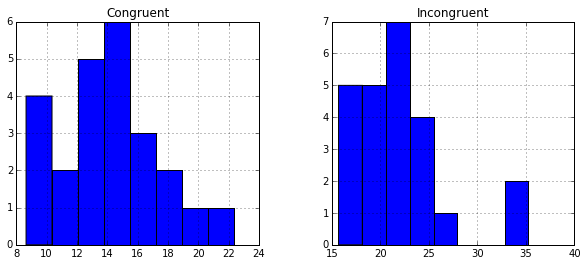

In [9]:
# Quick print of simple histograms
df.hist(bins=8,figsize=(10, 4))

The Congruent dataset is more likely normal than the incongruent dataset which seems to be skewed to the left, which is *postively skewed*.

#### Density

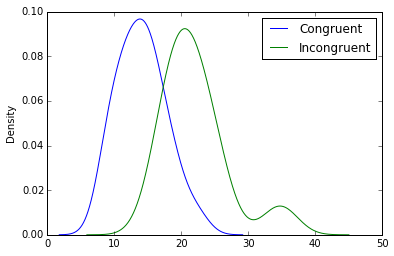

In [10]:
# this uses pyplot - fyi instead of the ggplot2
df.plot(kind='kde')

The curves are similar with the exception of the right shifted Incongruent curve due to the Stroop effect.  We can see the Incongruent normalized curve has a bump out to the right, due to the outliers.

> "In statistics, kernel density estimation (KDE) is a non-parametric way to estimate the probability density function of a random variable. Kernel density estimation is a fundamental data smoothing problem where inferences about the population are made, based on a finite data sample."

[Wikipedia - Kernal Density Estimation](https://en.wikipedia.org/wiki/Kernel_density_estimation)


#### Combined Histogram and Normalized Plot


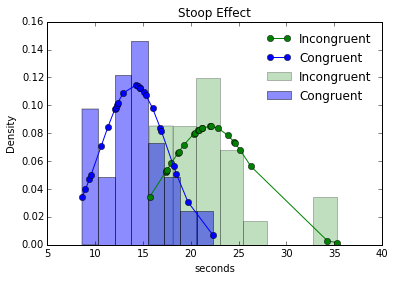

In [11]:
# Steps, to plot the normalized data  
# 1. sort the column ascending for the data 
# 2. pdf - apply the probability density function using the 
#      mean and standard deviation to new dataframe
#      http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html
# 3. plot the sorted seconds, along with the pdf
# 4. plot the histogram
# Incongruent = Greens
incog = df.sort(['Incongruent'], ascending=[1])
ifit = stats.norm.pdf(incog['Incongruent'], np.mean(incog['Incongruent']), np.std(incog['Incongruent']))
plt.plot(incog['Incongruent'],ifit,'-o',label='Incongruent', color='g')
plt.hist(incog['Incongruent'], bins=8, normed=True, alpha=0.25, label='Incongruent',color='g')

#Congruent - Blues
cog = df.sort(['Congruent'], ascending=[1])
cfit = stats.norm.pdf(cog['Congruent'], np.mean(cog['Congruent']), np.std(cog['Congruent']))
plt.plot(cog['Congruent'],cfit,'-o',label='Congruent',color='b')
plt.hist(cog['Congruent'], bins=8, normed=True, alpha=0.45, label='Congruent',color='b')
plt.title('Stoop Effect')
plt.xlabel('seconds')
plt.ylabel('Density')
plt.legend(loc='best', frameon=False)
# resize to show the distribution of the data
plt.figure(figsize(10,5))


This plot shows the effect of interference when the subject 'says' the color of ink when the word color is different than the ink color.   The goal here is to view the central tendency and variabilty in one plot.

#### Box Plots

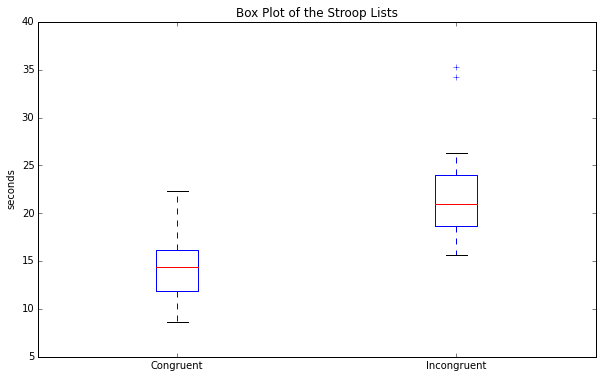

In [12]:
# print out simple box plot
df.plot(kind='box', figsize=(10,6))
plt.title('Box Plot of the Stroop Lists')
plt.ylabel("seconds")

Box plots show us the spread of the data, using the quartiles, median and the min and max points as well as the outliers for the data.  We can see above the Incongruent data has outliers around 35 seconds.

One can visually see it takes the sample population more time to read the color of the ink of the words for the incongruent list with the box plot.  We can even quickly see the medians are much different as well as the ranges for the congruent and incongruent datasets.

The data seems to be leading us to say it takes more time for a subject to say the color of the ink out loud when the color word is different than the color.

#### BarPlot

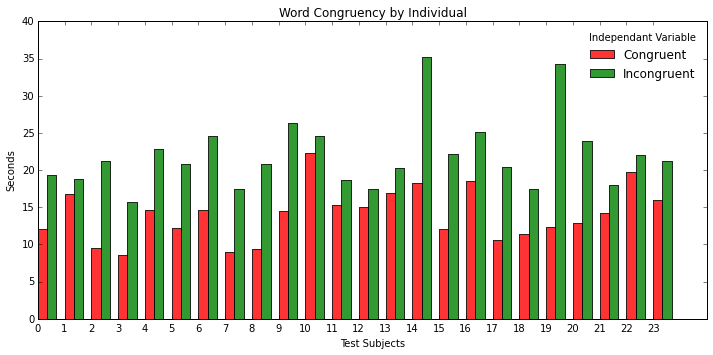

In [13]:
congruent_data = df['Congruent']
incongruent_data =df['Incongruent']

fig, ax = plt.subplots()

#index is equal to the individual ids
index = congruent_data.index.values
bar_width = 0.35
opacity = 0.8

p1 = plt.bar(congruent_data.index.values, congruent_data, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Congruent')

p2 = plt.bar(incongruent_data.index.values + bar_width, incongruent_data, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Incongruent')

plt.xlabel('Test Subjects')
plt.ylabel('Seconds')
plt.title('Word Congruency by Individual')
plt.legend(loc='best', frameon=False, title='Independant Variable')
xticks( congruent_data.index.values )

plt.tight_layout()
plt.show()

The barplot shows is a good representation of how the incongruent word list time to completion is much larger than the congruent word lists.

### 5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

For Paired t, the hypotheses are:  

**Null hypothesis**  
H0: μd = μ0  
The population mean of the differences (μd) equals the hypothesized mean of the differences (μ0).  

**Alternative hypothesis**  
H1: μd ≠ μ0  
The population mean of the differences (μd) does not equal the hypothesized mean of the differences (μ0).   


*Notes*
> If we observe a large p-value, for example greater than 0.025 (two tail) then we cannot reject the null hypothesis. Small p-values are associated with large t-statistics.

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html


#### Confidence Interval

[t table look up for 23 df](https://s3.amazonaws.com/udacity-hosted-downloads/t-table.jpg)



##### One Tail Confidence Intervals t(23) [23 degrees of freedom]
 - 0.05 alpha 1.714, one tail
 - 0.01 alpha 2.500, one tail
 - 0.001 alpha 3.485, one tail
 
##### Two Tail Confidence Intervals t(23) [23 degrees of freedom]
 - 0.025 alpha 2.069, two tail
 - 0.005 alpha 2.807, two tail
 - 0.0005 alpha 3.768, two tail
 
####  Normal Distribution Plot

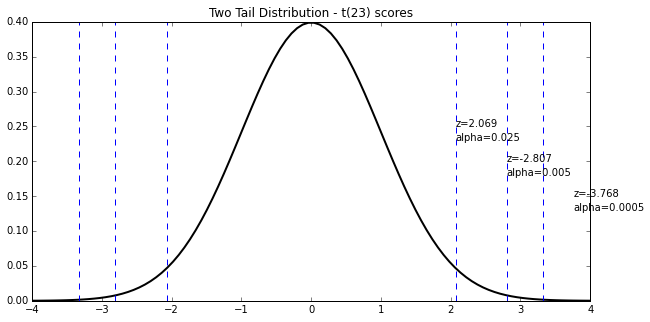

In [14]:
# setup the equation
mean_plot = 0
variance = 1
sigma = np.sqrt(variance)
x = np.linspace(-4,4,100)  # define the length of the tail out to 4 std dev
                          # and population size of 100 to get normalized shape
plt.title('Two Tail Distribution - t(23) scores')
plt.plot(x,mlab.normpdf(x,mean_plot,sigma),'k-', lw=2)
plt.axvline(-2.069, color='b', linestyle='dashed', linewidth=1)
plt.axvline(2.069, color='b', linestyle='dashed', linewidth=1)
plt.axvline(-2.807, color='b', linestyle='dashed', linewidth=1)
plt.axvline(2.807, color='b', linestyle='dashed', linewidth=1)
plt.axvline(-3.327, color='b', linestyle='dashed', linewidth=1)
plt.axvline(3.327, color='b', linestyle='dashed', linewidth=1)
plt.text(2.069,  .25, r'z=2.069')
plt.text(2.069,  .23, r'alpha=0.025')
plt.text(2.807, .20, r'z=-2.807')
plt.text(2.807,  .18, r'alpha=0.005')
plt.text(3.768, .15, r'z=-3.768')
plt.text(3.768,  .13, r'alpha=0.0005')
plt.show()

## Calculations 

In [15]:
diff= df
diff['diff'] = diff['Incongruent']-diff['Congruent']   # Create a difference column


In [16]:
# we have reviewed the data and we know the sample sizes are similar
diff_n = diff['diff'].count()   # Sample count

# Get the means of all the samples
diff_con_mean = stats.tmean(diff['Congruent'], limits=None, inclusive=(True, True)) 
diff_incog_mean = stats.tmean(diff['Incongruent'], limits=None, inclusive=(True, True)) 
diff_mean = stats.tmean(diff['diff'], limits=None, inclusive=(True, True)) 

In [17]:
# Get the standard deviations of the samples
# http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html
sd_pop = stats.tstd(df['Congruent'], limits=None, inclusive=(True, True))
sd_sample = stats.tstd(df['Incongruent'], limits=None, inclusive=(True, True))
diff_sd = stats.tstd(df['diff'], limits=None, inclusive=(True, True)) # verified with test calc 1.0

# test calc 1.0 - validate the sample sd equation (make sure I'm using the correct method from scipy)
diff['diff_mean_var']  = diff['diff']-diff_mean
diff['squared_diff'] = np.square(df['diff_mean_var'])
diff_sum = diff['squared_diff'].sum()
diff_sd_sample_mean = (diff_sum / (diff_n-1))
diff_sd_check = np.sqrt(diff_sd_sample_mean)

In [18]:
# calculate the stats
point_estimate = diff_incog_mean - diff_con_mean 
diff_t_statistic = point_estimate / (diff_sd /  np.sqrt(diff_n))
cohens_d = point_estimate / diff_sd

# calculate CI for 2-tail t test, 95%
lower_CI = point_estimate - (2.069 * (diff_sd / np.sqrt(diff_n)))
upper_CI = point_estimate + (2.069 * (diff_sd / np.sqrt(diff_n)))

print 'CRITICAL VALUE(S)'
print 'T-Statistic\t\t\t = %.5f' % diff_t_statistic
print '\n'

print 'EFFECT SIZE MEASURES'
print 'Point Estimate\t\t\t = %.5f'% point_estimate
print 'Cohens-D\t\t\t = %.5f' % cohens_d
# Standard error is the sigma of pop / sqrt(sample number)
# for the sampling distribution
SE = sd_pop/np.sqrt(diff_n)
print('STANDARD ERROR OF THE MEAN \t = ' + str(sd_pop/np.sqrt(diff_n)))
print ' \n'

print 'DESCRIPTIVE STATISTICS'
print '\t\tn\tmean\tStDev\tSE Mean'
print 'Congruent\t%.2f\t%.2f\t%.2f\t%.2f' % (diff_n,diff_con_mean,sd_pop,(sd_pop/np.sqrt(diff_n)))
print 'Incongruent\t%.2f\t%.2f\t%.2f\t%.2f' % (diff_n,diff_incog_mean,sd_sample,(sd_sample/np.sqrt(diff_n)))
print 'Difference\t%.2f\t%.2f\t%.2f\t%.2f' % (diff_n,diff_mean,diff_sd,(diff_sd/np.sqrt(diff_n)))
print '\n'
print 'CONFIDENCE INTERVALS'
print '95%% CI  for the mean difference: (%.5f, %.5f)' % (lower_CI,upper_CI)
print 'Margin of Error: %.2f' % ((upper_CI-lower_CI)/2.0)
print '\n'

# re-run for 99.9
lower_CI = point_estimate - (3.768 * (diff_sd / np.sqrt(diff_n)))
upper_CI = point_estimate + (3.768 * (diff_sd / np.sqrt(diff_n)))
print '99.9%% CI  for the mean difference:  (%.5f, %.5f)' % (lower_CI,upper_CI)
print 'Margin of Error: %.2f' % ((upper_CI-lower_CI)/2.0)
print '\n'

# t-test via scipy 
# returns t-statistic and two-tailed p-value
paried_t_test_results = stats.ttest_rel(df['Incongruent'],df['Congruent'])
t_statistic = paried_t_test_results[0]
p_value = paried_t_test_results[1]
print "The t-statistic is %.5f and the p-value is %.9f" % paried_t_test_results
print 'T-Test for the mean difference = 0 (vs != 0) : T-Value: %.2f P-Value: %.9f ' % (diff_t_statistic,p_value )

CRITICAL VALUE(S)
T-Statistic			 = 8.02071


EFFECT SIZE MEASURES
Point Estimate			 = 7.96479
Cohens-D			 = 1.63722
STANDARD ERROR OF THE MEAN 	 = 0.726550900679
 

DESCRIPTIVE STATISTICS
		n	mean	StDev	SE Mean
Congruent	24.00	14.05	3.56	0.73
Incongruent	24.00	22.02	4.80	0.98
Difference	24.00	7.96	4.86	0.99


CONFIDENCE INTERVALS
95% CI  for the mean difference: (5.91022, 10.01937)
Margin of Error: 2.05


99.9% CI  for the mean difference:  (4.22306, 11.70652)
Margin of Error: 3.74


The t-statistic is 8.02071 and the p-value is 0.000000041
T-Test for the mean difference = 0 (vs != 0) : T-Value: 8.02 P-Value: 0.000000041 


### Conclusion

We **reject the null hypothesis** for our paired t-test because the absolute value of the test statistic (8.02) is greater than the critical value (3.768). 

A paired-samples t-test was run on a sample of 24 subjects to determine whether there was a statistically significant mean difference in time (seconds) between reading word lists of congruent and incongruent lists. Participants' incongruent reading time is higher (22.016 ± 4.797 seconds) than the congruent reading times (14.051 ± 3.559 seconds); a statistically significant mean increase of 8.65 (99.9% CI, 4.223, 11.707) seconds, t(23) = 8.02, p < .0005.

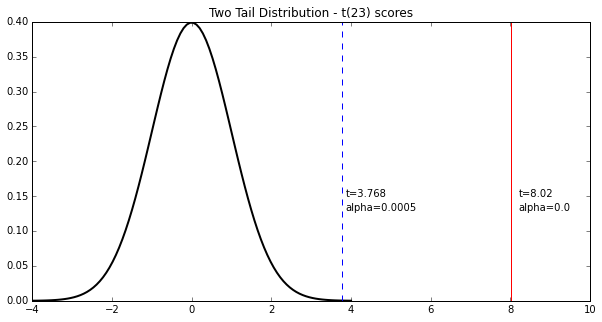

In [19]:
# equation variables defined a above
plt.title('Two Tail Distribution - t(23) scores')
plt.plot(x,mlab.normpdf(x,mean_plot,sigma),'k-', lw=2)
plt.axvline(3.768, color='b', linestyle='dashed', linewidth=1)
plt.axvline(8.02, color='r', linestyle='-', linewidth=1)
plt.text(3.868, .15, r't=3.768')
plt.text(3.868,  .13, r'alpha=0.0005')
plt.text(8.22, .15, r't=8.02')
plt.text(8.22,  .13, r'alpha=0.0')
plt.show()

#### T-Statistic is far to the right of out t-critical value of 3.768.

In [20]:
# code up the t-test check for H0 rejection
# Reject the null hypo when p value is less than probility of alpha's
# p-values from stats.ttest_rel is 2 tail
rejection = False   # monitor rejection based on p-values
result    = ''      # setup output
if p_value < 0.025:
    rejection = True
    result ='p value %.9f is in the critical region for alpha level 0.025' % p_value
if p_value < 0.005:
    rejection = True
    result = 'p value %.9f is in the critical region for alpha level 0.005' % p_value
if p_value < 0.005:
    rejection = True
    result = 'p value %.9f is in the critical region for alpha level 0.0005' % p_value
else:
    print 'you lose'
    
print 'Rejection of H0: %s' % rejection    
print result    

Rejection of H0: True
p value 0.000000041 is in the critical region for alpha level 0.0005


### 6. What do you think is responsible for the effects observed? 

Based on the theories listed my pick is 'Selective Attention' and 'Parallel Distributed Processing'.

See Wikiepdia - The Stroop Effect | Wikiepdia - The Stroop Effect

### Can you think of an alternative or similar task that would result in a similar effect? 

Learning a new language and having to read the words in German and think of the translation back to English.  At the oncept of learning the language I would suppose one could have a 'Parallel Distributed Processing'  because we are reading and also processing and mapping the German word back to English and then mapping the English word back to it's meaning.



## References

[Pandas Documentation](http://pandas.pydata.org/pandas-docs/version/0.15.0/visualization.html)

[Wikiepdia - The Stroop Effect](https://en.wikipedia.org/wiki/Stroop_effect)

[Paired T-Test | Lared](https://statistics.laerd.com/minitab-tutorials/paired-t-test-using-minitab.php)

[Wilcox Signed Rank | Lared](https://statistics.laerd.com/minitab-tutorials/wilcoxon-signed-rank-test-using-minitab.php)


### [Notes]

Chart Examples and equations used to understand the math behind various methods in the python.

Re-using the variables is going to be a debuging pain when an error in the code occurs.  Need a better way or new variables per sample.

In [21]:
# scipy standard error method mean (SE) ->  std deviation / sqrt(sample size)
# ddof = 1, checking these values against the calculated ones
print ' SE Congruent:  ' + str(stats.sem(df['Congruent'], axis=None, ddof=1))
print ' SE Incongruent:' + str(stats.sem(df['Incongruent'], axis=None, ddof=1))

 SE Congruent:  0.726550900679
 SE Incongruent:0.979195184753


#####  Charts

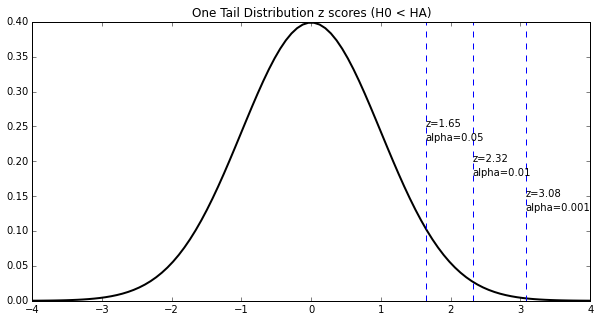

In [22]:
# setup the equation
plt.title('One Tail Distribution z scores (H0 < HA)')
plt.plot(x,mlab.normpdf(x,mean_plot,sigma),'k-', lw=2)
plt.axvline(1.65, color='b', linestyle='dashed', linewidth=1)
plt.axvline(2.32, color='b', linestyle='dashed', linewidth=1)
plt.axvline(3.08, color='b', linestyle='dashed', linewidth=1)
plt.text(1.65,  .25, r'z=1.65')
plt.text(1.65,  .23, r'alpha=0.05')
plt.text(2.32, .20, r'z=2.32')
plt.text(2.32, .18, r'alpha=0.01')
plt.text(3.08,  .15, r'z=3.08')
plt.text(3.08,  .13, r'alpha=0.001')
plt.show()

